In [234]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [269]:
train = pd.read_csv('train_BRCpofr.csv')
test = pd.read_csv('test_koRSKBP.csv')

In [270]:
train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [271]:
# train.isnull().sum(),train.isna().sum()

In [272]:
# train.info()

In [273]:
# train.drop(['qualification'],axis=1,inplace=True)
# test.drop(['qualification'],axis=1,inplace=True)

In [274]:
train.skew(axis = 0, skipna = True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_14004\1527242638.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew(axis = 0, skipna = True)


id                0.000000
marital_status   -0.305457
vintage          -0.378267
claim_amount      1.044233
cltv              2.753065
dtype: float64

In [275]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [276]:
df = train.copy()
for i in df.columns:
    if df[i].dtypes =='O':
        df[i] = le.fit_transform(df[i])
df

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,0,1,1,5,5790,1,0,1,64308
1,2,1,0,1,1,0,8,5080,1,0,1,515400
2,3,1,1,0,1,1,8,2599,1,0,1,64212
3,4,0,0,1,1,0,7,0,1,0,1,97920
4,5,1,1,1,3,1,6,3508,1,0,0,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,1,0,1,3,0,6,0,1,1,1,95736
89388,89389,1,1,0,1,1,0,3897,1,0,1,67596
89389,89390,0,1,0,1,0,4,3363,1,1,1,114120
89390,89391,0,0,1,0,0,8,0,1,1,1,71772


In [277]:
# sns.pairplot(data=df, diag_kind='kde')

In [278]:
import matplotlib.pyplot as plt
import scipy.stats as stats
def diagnostic_plots (df, variable):
    # function to plot a histogram and a Q-Q plot
    #side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df [variable].hist()
    plt.subplot (1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

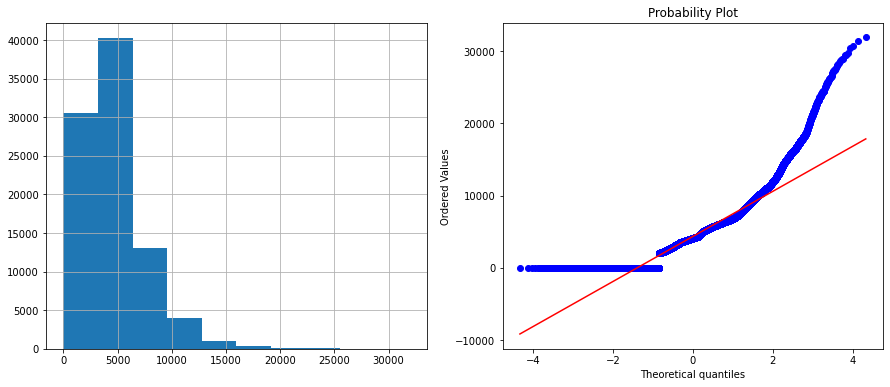

In [279]:
diagnostic_plots(train,'claim_amount')

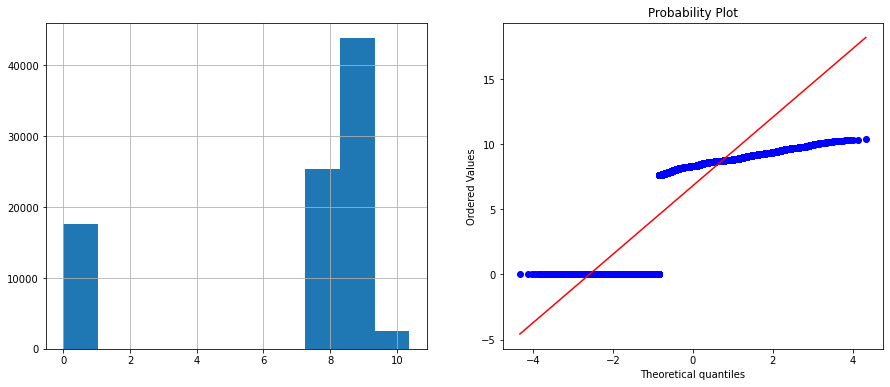

In [130]:
# train['log_claim_amount']=np.log(train['claim_amount']+1)
# diagnostic_plots(train, 'log_claim_amount')

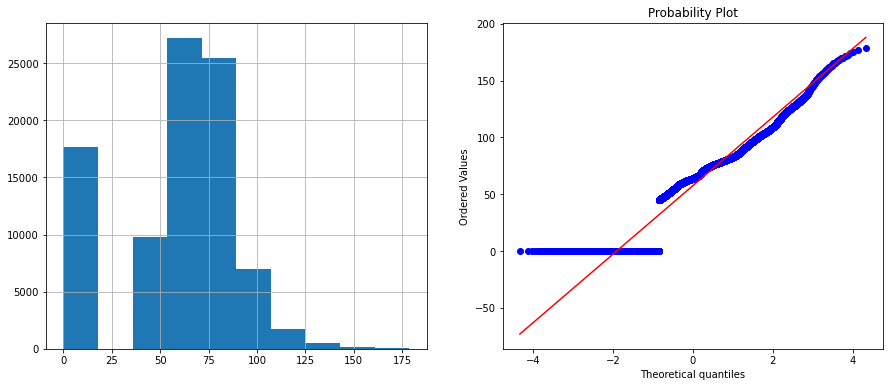

In [184]:
# train['sqr_claim_amount']=np.sqrt(train.claim_amount)
# diagnostic_plots(train, 'sqr_claim_amount')
# test['claim_amount']=test['claim_amount']** (1/2)
# diagnostic_plots(test, 'claim_amount')

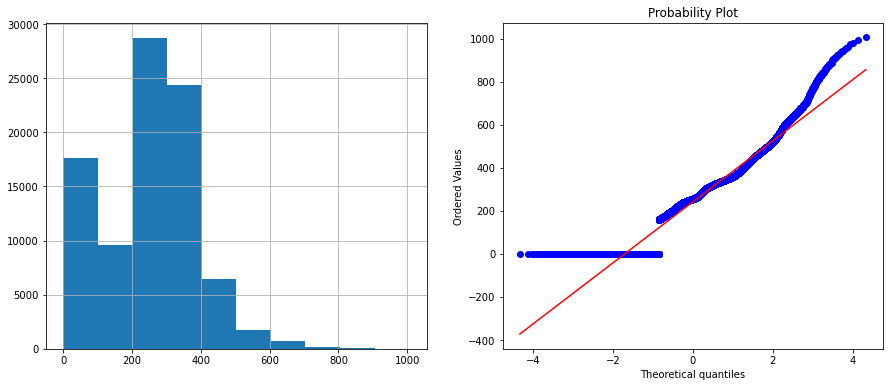

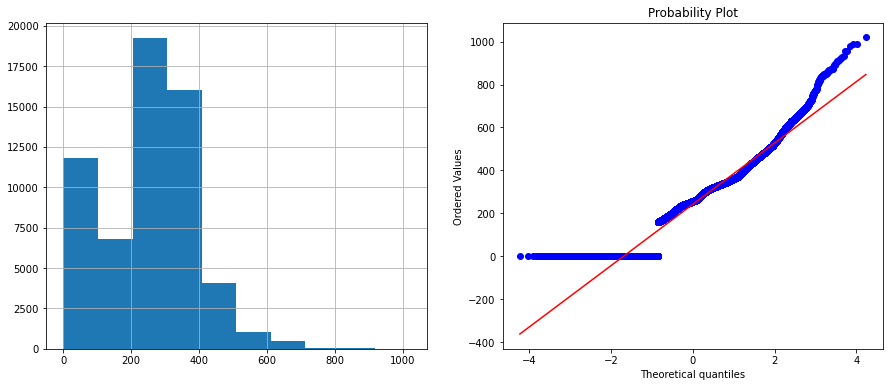

In [258]:
# train['claim_amount']=train['claim_amount']** (1/1.5)
# diagnostic_plots (train, 'claim_amount')
# test['claim_amount']=test['claim_amount']** (1/1.5)
# diagnostic_plots(test, 'claim_amount')

In [281]:
# train['box_claim_amount'], param = stats.boxcox(train.claim_amount+1)
# print('Optimal lambda: ', param)
# diagnostic_plots(train, 'box_claim_amount')

In [282]:
# train = pd.get_dummies(train)
# test = pd.get_dummies(test)

In [283]:
X=train.drop(['cltv','id'],axis=1)
xtest = test.drop('id',axis=1)
y = train['cltv']

In [284]:
for i in X.columns:
    if X[i].dtypes =='O':
        X[i] = le.fit_transform(X[i])
x = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
for i in xtest.columns:
    if xtest[i].dtypes =='O':
        xtest[i] = le.fit_transform(test[i])
xx = xtest.values
test_scaled = min_max_scaler.fit_transform(xx)
xtest = pd.DataFrame(test_scaled)
xtest

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.5,0.333333,0.0,0.750,0.065593,1.0,0.5,1.0
1,0.0,1.0,0.5,0.000000,0.0,0.500,0.126083,1.0,0.0,0.5
2,1.0,0.0,0.5,0.333333,1.0,0.875,0.089906,1.0,0.5,0.0
3,0.0,0.0,0.0,1.000000,1.0,0.250,0.000000,1.0,0.5,1.0
4,0.0,1.0,0.5,0.000000,0.0,0.625,0.432133,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...
59590,1.0,0.0,0.0,0.333333,1.0,0.750,0.000000,0.0,0.0,1.0
59591,1.0,1.0,0.5,0.333333,0.0,0.750,0.000000,0.0,1.0,0.0
59592,0.0,1.0,0.5,0.000000,1.0,0.500,0.102139,1.0,0.5,0.5
59593,1.0,0.0,0.0,0.333333,0.0,0.125,0.088707,1.0,0.0,1.0


In [285]:
# std_scaler = preprocessing.StandardScaler()
# for i in X.columns:
#     if X[i].dtypes =='O':
#         X[i] = le.fit_transform(X[i])
# X_scaled = std_scaler.fit_transform(X.to_numpy())
# X = pd.DataFrame(X_scaled)
# for i in xtest.columns:
#     if xtest[i].dtypes =='O':
#         xtest[i] = le.fit_transform(test[i])
# test_scaled = std_scaler.fit_transform(xtest.to_numpy())
# xtest = pd.DataFrame(test_scaled)
# xtest

In [286]:
# X.drop('claim_amount',axis=1,inplace=True)

In [287]:
# !pip install mlxtend

In [288]:
# !pip install lightgbm
# !pip install xgboost
# !pip install --upgrade ngboost
# !pip install catboost

In [289]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from ngboost import NGBRegressor

## XGBOOST

In [290]:
# dtrain = xgb.DMatrix(X, label=y)
# dtest = xgb.DMatrix(xtest)

# params = {'colsample_bytree': 0.7,
#           'eta': 0.1, 
#           'max_depth': 4, 
#           'nthread': 2, 
#           'seed': 42, 
#           'subsample': 1.0}
# # model = xgb.XGBRegressor()
# # model.set_params(**params)
# # model.fit(X, y)
# num_rounds = 50
# model = xgb.train(params, dtrain, num_rounds)

# # # make predictions on the test set
# pred = model.predict(dtest)

In [291]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'max_depth': [4],
#               'eta': [0.1],
#               'subsample': [0.2,1.0],
#               'colsample_bytree': [0.7,0.2,0.1],
#               'nthread': [2],
#               'seed': [42]
#              }
# xgb_model = xgb.XGBRegressor()
# xgb_grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)
# xgb_grid_search.fit(X, y)


# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",xgb_grid_search.best_estimator_)
# print("\n The best score across ALL searched params:\n",xgb_grid_search.best_score_)
# print("\n The best parameters across ALL searched params:\n",xgb_grid_search.best_params_)

## LGB

In [292]:
# train_data = lgb.Dataset(X, label=y)
# params ={'bagging_fraction': 1.0, 
#          'bagging_freq': 5, 
#          'boosting_type': 'gbdt', 
#          'feature_fraction': 0.8, 
#          'learning_rate': 0.05, 
#          'num_leaves': 31, 
#          'verbose': 0}

# num_rounds = 100
# model = lgb.train(params, train_data, num_boost_round=num_rounds)

In [293]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'boosting_type': ['gbdt', 'dart', 'goss'],
#     'num_leaves': [31, 50, 100],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'feature_fraction': [0.8, 0.9, 1.0],
#     'bagging_fraction': [0.8, 0.9, 1.0],
#     'bagging_freq': [5, 10, 20],
#     'verbose': [0]
# }
# lgb_model = lgb.LGBMRegressor()
# lgb_grid_search = GridSearchCV(lgb_model, param_grid, cv=5,n_jobs=-1)
# lgb_grid_search.fit(X,y)

# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",lgb_grid_search.best_estimator_)
# print("\n The best score across ALL searched params:\n",lgb_grid_search.best_score_)
# print("\n The best parameters across ALL searched params:\n",lgb_grid_search.best_params_)

## NGBR

In [294]:
# model = NGBRegressor()
# params = {'learning_rate': 0.2,
#           'minibatch_frac': 0.7,
#           'n_estimators': 150
# }

# model.set_params(**params)
# model.fit(X, y)

In [295]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'minibatch_frac': [0.7, 0.8, 0.9]
# }

# ngb_model = NGBRegressor()
# ngb_grid_search = GridSearchCV(ngb_model, param_grid, cv=5, n_jobs=-1)
# ngb_grid_search.fit(X, y)

# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",ngb_grid_search.best_estimator_)
# print("\n The best score across ALL searched params:\n",ngb_grid_search.best_score_)
# print("\n The best parameters across ALL searched params:\n",ngb_grid_search.best_params_)

## CATBOOST

In [301]:
# params = {
#     'loss_function': 'RMSE',
#     'depth': 5,
#     'learning_rate': 0.05,
#     'subsample': 1.0,
#     'random_seed': 42,
#     'eval_metric': 'RMSE',
#     'task_type': 'CPU',
#     'l2_leaf_reg': 0.1,
#     'iterations': 170,
#     'random_strength':0.8
# }

params = {
    'loss_function': 'RMSE',
    'depth': 5,
    'learning_rate': 0.05,
    'subsample': 1.0,
    'random_seed': 42,
    'eval_metric': 'RMSE',
    'task_type': 'CPU',
    'l2_leaf_reg': 7,
    'iterations': 150
}

model = cb.CatBoostRegressor(**params)
model.fit(X, y)

0:	learn: 89934.9885812	total: 9.1ms	remaining: 1.35s
1:	learn: 89321.2778903	total: 15.7ms	remaining: 1.16s
2:	learn: 88747.9929287	total: 22.7ms	remaining: 1.11s
3:	learn: 88242.7565677	total: 29.6ms	remaining: 1.08s
4:	learn: 87771.1331444	total: 36ms	remaining: 1.04s
5:	learn: 87357.9246275	total: 42.5ms	remaining: 1.02s
6:	learn: 86972.6924779	total: 48.6ms	remaining: 992ms
7:	learn: 86628.6595318	total: 55.9ms	remaining: 993ms
8:	learn: 86312.6468352	total: 62.2ms	remaining: 975ms
9:	learn: 86019.2498147	total: 68.4ms	remaining: 958ms
10:	learn: 85756.4079384	total: 74.5ms	remaining: 942ms
11:	learn: 85519.4049999	total: 80.2ms	remaining: 923ms
12:	learn: 85295.8174842	total: 86.2ms	remaining: 908ms
13:	learn: 85100.6443636	total: 92.2ms	remaining: 896ms
14:	learn: 84924.4625909	total: 98.2ms	remaining: 884ms
15:	learn: 84757.2136606	total: 104ms	remaining: 874ms
16:	learn: 84602.3747490	total: 110ms	remaining: 864ms
17:	learn: 84467.7696447	total: 117ms	remaining: 855ms
18:	lear

In [302]:
# param_grid = {
#     'depth': [5],
#     'learning_rate': [0.05],
#     'l2_leaf_reg': [0.1],
#     'subsample': [1.0],
#     'iterations':[170],
#     'random_strength':[0.8]
    
# }

# cb_model = cb.CatBoostRegressor()
# cb_grid_search = GridSearchCV(cb_model, param_grid, cv=5, n_jobs=-1)
# cb_grid_search.fit(X, y)


# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",cb_grid_search.best_estimator_)
# print("\n The best score across ALL searched params:\n",cb_grid_search.best_score_)
# print("\n The best parameters across ALL searched params:\n",cb_grid_search.best_params_)

### MAKE PREDICTION

In [303]:
pred = model.predict(xtest)
pred = list(pred)
pred = [int(x) for x in pred]

In [304]:
test['cltv'] = pred
test

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver,93192
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum,128376
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold,95383
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver,88563
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver,136128
...,...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver,47951
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold,55371
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum,106817
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver,105615


In [305]:
sample_submission = test[['id','cltv']]
sample_submission.to_csv("submission.csv",index=False)